# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

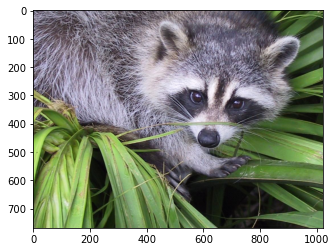

In [32]:
#Searched something about citipy and came up with this Easter Egg - enjoy!

from scipy import misc
import matplotlib.pyplot as plt

face = misc.face()
plt.imshow(face)
plt.show()

In [33]:
#Import dependencies
import requests
import json
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
from scipy.stats import linregress
from citipy import citipy

# Google developer API key
from api_keys import g_key
from api_keys import weather_api_key
temp_units = "imperial"

# Access maps with unique API key
gmaps.configure(api_key=g_key)

## Generate Cities List

In [34]:
# variables and list of cities to query

lat_range = (-90, 90)
long_range= (-180, 180)

cities = []

# Create a set of random lat and long combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lon = zip(lat, long)

for value in lat_lon:
    city = citipy.nearest_city(value[0], value[1]).city_name
    if city not in cities:
        cities.append(city)


len(cities)

605

In [35]:
#Let's find the city nearest by!
for lats_longs in lat_lon:
    city = citipi.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
#Writing the line of code to create the query urls

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# list for response results
lat = []
long = []
cloudiness = []
humidities = []
temp = []
wind_speed = []
country_d = []
date = []
cityname = []


response= requests.post(query_url)

# loop through cities, make API request, and append desired results
x= 0
for city in cities:
    try:
        response = requests.get(query_url+city).json()  
        x = x+1
        print(f"Processing Record {x} | {city}")
#     except:
#         print("City not found. Skip")
        
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        humidities.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        country_d.append(response["sys"]['country'])
        date.append(response["dt"])
        cityname.append(response["name"])
    except:
        print("City not found. Skip")
print("------------------------------\nData Retrieval Complete\n------------------------------")


ssing Record 39 | tocopilla
Processing Record 40 | salalah
Processing Record 41 | atuona
Processing Record 42 | samusu
City not found. Skip
Processing Record 43 | buala
Processing Record 44 | kuching
Processing Record 45 | bereda
Processing Record 46 | airai
Processing Record 47 | abha
Processing Record 48 | hualmay
Processing Record 49 | poum
Processing Record 50 | neiafu
Processing Record 51 | bluff
Processing Record 52 | nouakchott
Processing Record 53 | esperance
Processing Record 54 | mala
Processing Record 55 | saskylakh
Processing Record 56 | hobart
Processing Record 57 | saint-philippe
Processing Record 58 | nouadhibou
Processing Record 59 | kavieng
Processing Record 60 | dongying
Processing Record 61 | noumea
Processing Record 62 | sinnamary
Processing Record 63 | junin
Processing Record 64 | te anau
Processing Record 65 | dunedin
Processing Record 66 | constitucion
Processing Record 67 | lebu
Processing Record 68 | drovyanaya
Processing Record 69 | narsaq
Processing Record 70

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
# Creating a dictionary
df = ({"City": cityname, "Lat": lat, "Lng": long, "Max Temp": temp, "Humidity": humidities, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country_d, "Date": date})
# Making a dataframe
df2=pd.DataFrame(df)

# Converting to a csv file and saving it in the output_data folder - DataFrame.to_csv()
weatherdf = df2.to_csv('C:\\Users\\morga\\Repositories\\APIsChallenge\\Instructions\\starter_code\\weather.csv', index = False) 
weatherdf = pd.read_csv('../output_data/weather.csv')
weatherdf

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,51.80,58,75,3.44,AR,1612111689
1,Boyolangu,-8.1181,111.8935,76.21,86,100,2.04,ID,1612111883
2,Fort Nelson,58.8053,-122.7002,-20.20,76,75,3.44,CA,1612111883
3,Narsaq,60.9167,-46.0500,39.20,28,75,25.32,GL,1612111884
4,Mataura,-46.1927,168.8643,55.38,70,100,2.08,NZ,1612111884
...,...,...,...,...,...,...,...,...,...
560,Algiers,36.7525,3.0420,60.80,59,20,20.71,DZ,1612111998
561,Wanlaweyn,2.6185,44.8938,76.21,66,6,20.11,SO,1612111998
562,Arman',59.7000,150.1667,-15.03,76,99,12.86,RU,1612111998
563,Abay,49.6311,72.8539,12.20,73,0,6.71,KZ,1612111998


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
#  Get the indices of cities that have humidity over 100%.


In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

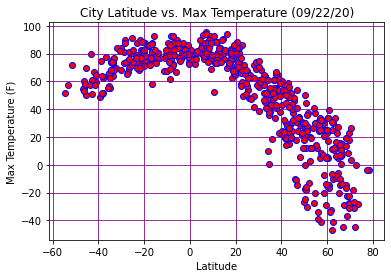

In [40]:

# Plot Latitude vs. Temperature
x = weatherdf['Lat']
y = weatherdf['Max Temp']


plt.scatter(x, y, marker = "o", facecolors = "red", edgecolors = "blue")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="purple")

plt.savefig("../output_data/fig1.png")
plt.title("City Latitude vs. Max Temperature (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

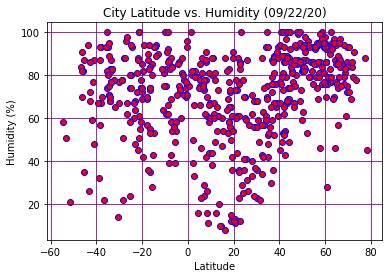

In [41]:
# Plot Latitude vs. Humidity
x= weatherdf['Lat']
y = weatherdf['Humidity']


plt.scatter(x, y, marker = "o", facecolors = "red", edgecolors = "blue")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="purple")

plt.savefig("../output_data/fig2.png")
plt.title("City Latitude vs. Humidity (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

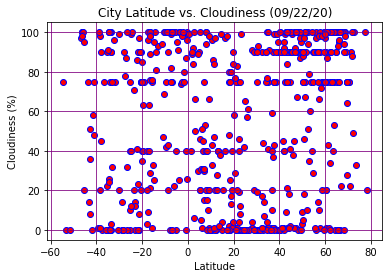

In [42]:
# Plot Latitude vs. Cloudiness
x= weatherdf['Lat']
y = weatherdf['Cloudiness']


plt.scatter(x, y, marker = "o", facecolors = "red", edgecolors = "blue")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="purple")

plt.savefig("../output_data/fig3.png")
plt.title("City Latitude vs. Cloudiness (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

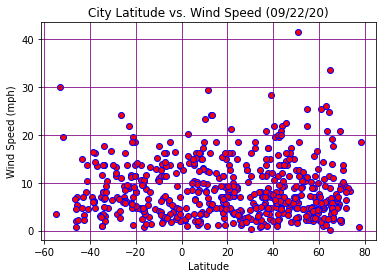

In [43]:
# Plot Latitude vs. Wind Speed
x= weatherdf['Lat']
y = weatherdf['Wind Speed']


plt.scatter(x, y, marker = "o", facecolors = "red", edgecolors = "blue")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="purple")

plt.savefig("../output_data/fig4.png")
plt.title("City Latitude vs. Wind Speed (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [45]:
# Linear Regression Northern Hemisphere Latitude vs. Temperature
# Creating Northern and Southern Hemisphere DataFrames. the latitude of the equator is 0. so 
North_df = weatherdf.loc[weatherdf["Lat"]>0]
South_df = weatherdf.loc[weatherdf["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8749047595711118


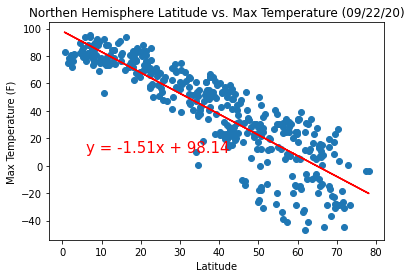

In [46]:
x= North_df['Lat']
y = North_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig5.png")
plt.title("Northen Hemisphere Latitude vs. Max Temperature (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6440707630489197


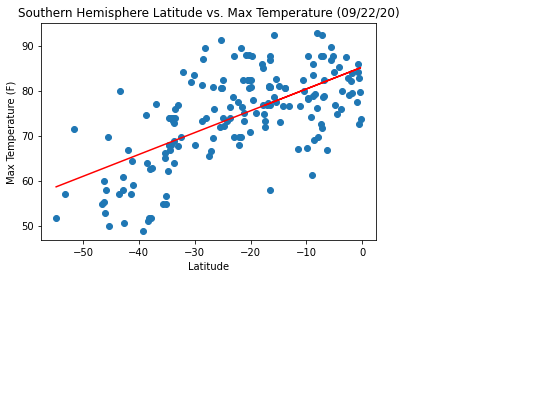

In [47]:
x= South_df['Lat']
y = South_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig6.png")
plt.title("Southern Hemisphere Latitude vs. Max Temperature (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.46875024245783287


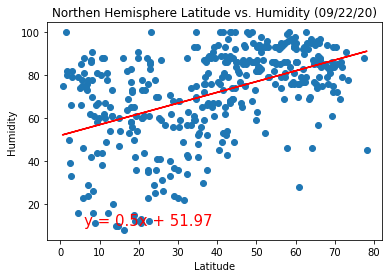

In [48]:
x= North_df['Lat']
y = North_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig7.png")
plt.title("Northen Hemisphere Latitude vs. Humidity (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0771026339755717


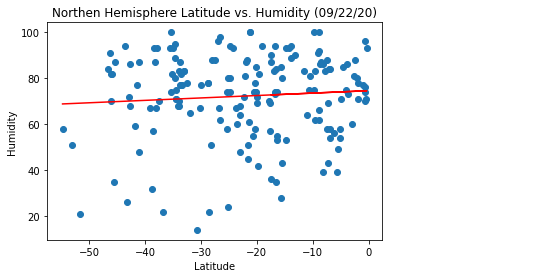

In [49]:
x= South_df['Lat']
y = South_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig8.png")
plt.title("Northen Hemisphere Latitude vs. Humidity (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3043427041816161


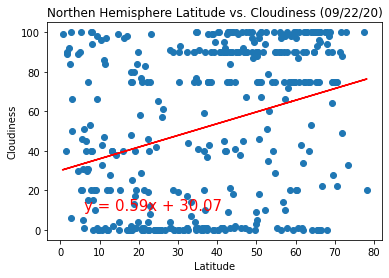

In [51]:
x= North_df['Lat']
y = North_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig9.png")
plt.title("Northen Hemisphere Latitude vs. Cloudiness (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22471771203658883


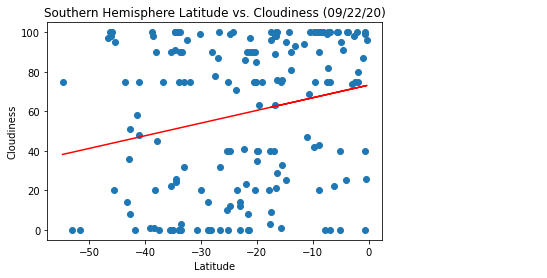

In [52]:
x= South_df['Lat']
y = South_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig10.png")
plt.title("Southern Hemisphere Latitude vs. Cloudiness (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression